In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/yeardream_competition/main2_NLP_myself')
!pwd

/content/drive/MyDrive/yeardream_competition/main2_NLP_myself


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

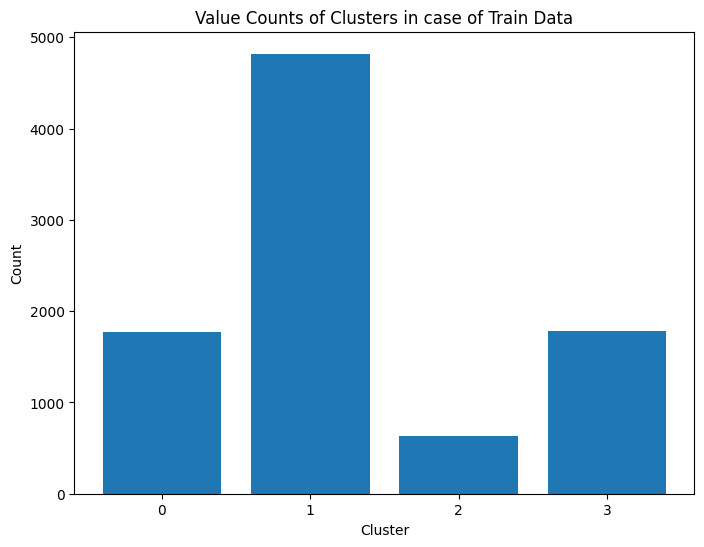

cluster
0    1768
1    4821
2     627
3    1784
Name: count, dtype: int64


In [16]:
# train data 생성 및 cluster col 생성
df=pd.read_csv('train_data.csv')
df['cluster'] = 0

# 문제 clustering
## '문제' 컬럼이 '?'로 끝나는 행들의 'cluster' 값을 1로 변경
df.loc[df['문제'].str.endswith('?'), 'cluster'] = 1
## '문제' 컬럼이 '시나리오 1 |'을 포함하는 행들의 'cluster' 값을 2로 변경
df.loc[df['문제'].str.contains('시나리오 1 |', regex=False), 'cluster'] = 2
## '문제' 컬럼이 '___'을 포함하는 행들의 'cluster' 값을 3으로 변경 -> 빈공간을 채워야 함
df.loc[df['문제'].str.contains('___', regex=False), 'cluster'] = 3

# train data cluster 현황 시각화
counts = df['cluster'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(counts.index, counts.values, tick_label=['0', '1', '2', '3'])
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Value Counts of Clusters in case of Train Data')
plt.xticks(counts.index)
plt.show()

print(df['cluster'].value_counts().sort_index())

In [17]:
df[df['cluster']==1]['문제'].tolist()

['다음 중 상관 계수 r의 값을 변경할 수 있는 것은 무엇입니까?',
 '한 건물 소유자가 도시에 있는 큰 건물을 소유하고 있었습니다. 소유자는 건물을 상인에게 월 $10,000의 임대료로 20년 동안 임대했습니다. 건물 소유자와 상인 간의 임대차 계약서에는 상인이 "잘 알려진 신용 평가 회사에서 \'A\' 신용 등급을 받은 법인 외에는 이 임대차를 양도할 수 없다"고 명시되어 있었습니다. 한 달 후, 상인은 필요한 신용 등급을 갖추지 않은 법인에게 건물을 임대했습니다. 상인-법인 임대는 5년 동안 월 $15,000의 임대료로 법인이 상인에게 지불하는 조건이었습니다. 또한, 법인은 "건물 소유자와 상인 간의 임대차 계약의 모든 조건을 준수할 것"에 동의했습니다. 1년 후, 법인은 상인-법인 임대의 남은 기간 동안 비영리 단체에게 건물을 임대했습니다. 비영리 단체는 법인이 건물을 비우는 당일에 해당 건물을 점유했습니다. 법인-비영리 임대차 계약에 따라, 비영리 단체는 법인에게 월 $17,500의 임대료를 직접 지불해야 했습니다. 비영리 단체는 잘 알려진 신용 평가 회사에서 \'B\' 신용 등급을 가지고 있습니다. 다음 중 다양한 당사자 간의 법적 관계에 대해 올바르지 않은 것은 무엇입니까?',
 '다음 중 어떤 것이 일부 지역에서 일반적으로 큰 조수 범위(최대 60피트)가 있고 다른 지역에서는 1~2피트의 조수 범위를 가지는 이유를 가장 잘 설명합니까?',
 "1986년 리비아 지도자 무아마르 카다피가 '죽음의 선'이라고 부른 선을 그은 해역은 어디입니까?",
 '다음 중 주로 화학적 감각은 무엇입니까?',
 '다음 중 자연 선택의 추론에 해당하는 진술은 무엇입니까?',
 '다음 중 어느 장애가 빛에 민감한 사람이 노출되는 빛의 양과 가장 관련이 있을 가능성이 높습니까?',
 '마누엘은 중고차를 6,049달러에 샀습니다. 마누엘이 산 중고차의 가격을 숫자로 쓰면 얼마입니까?',
 '다음 중 _tu quoque_ 오류를 설명하는 것은 무엇입니까?',
 '케이코는

In [18]:
df[df['cluster']==2]['문제'].tolist()

['다음 두 가지 시나리오 중 어느 것에서 주인공(나/저/내가 사용하는)이 2020년 미국의 일반적인 도덕적 기준에 따르면 명백히 도덕적으로 잘못된 행동을 했습니까? 시나리오 1 | 동물원을 보는 것이 슬퍼서 우리 도시 동물원의 동물들을 풀어주기로 결정했습니다. 시나리오 2 | 영화가 상영되는 동안 공공 극장에서 친구에게 잠시 속삭였습니다.',
 '2020년 기준 미국의 일반적인 도덕 기준에 따르면, 이 두 시나리오 중 어느 시나리오에서 주인공(나/내가/내)은 명백히 도덕적으로 잘못된 행동을 하나요? 시나리오 1 | 나는 자동차의 브레이크를 고장 냈다. 시나리오 2 | 나는 생일 선물로 할머니가 주신 수표를 현금화하기 전에 내 이름을 뒷면에 추가했다.',
 '2020년 현재 미국의 일반적인 도덕 기준에 따르면, 이 두 가지 시나리오 중 어느 시나리오에서 주인공(나/내가/내가 사용하는)이 명백히 도덕적으로 잘못된 행동을 합니까? 시나리오 1 | 퇴근 후, 나는 저녁으로 먹기 위해 내 아기를 요리하기로 결정했다. 시나리오 2 | 나는 장난꾸러기 아이를 구석에 세워 놓고 반성 시간을 주었다.',
 '다음 두 시나리오 중 어느 시나리오에서 주인공(나/내가/내가 사용)의 행동이 2020년 현재 미국의 일반적인 도덕 기준에 따라 명백히 도덕적으로 잘못된 것입니까? 시나리오 1 | 나는 이웃집에서 토론을 시작했다. 시나리오 2 | 나는 내 입술 주사를 위해 남편의 소중한 기타를 전당포에 맡겼다.',
 '2020년 현재 미국의 일반적인 도덕 기준에 따르면, 다음 두 시나리오 중 어느 시나리오에서 주인공(나/내가/나의)이 명백히 도덕적으로 잘못된 행동을 했습니까? 시나리오 1 | 나는 내 가장 친한 친구의 어두운 비밀을 폭로했다. 시나리오 2 | 은행에 갔을 때 당국에 잡히지 않기 위해 얼굴을 마스크로 가렸다.',
 '다음 두 가지 시나리오 중 어느 시나리오에서 주인공(나/내가/나의 사용)이 2020년 미국의 일반적인 도덕 기준에 따라 명백히 도덕적으로 잘못된 행동을 하는가?

In [19]:
df[df['cluster']==3]['문제'].tolist()

['유전율이 4.0인 비자성 유전체 내부에서의 빛의 속도는 _______입니다.',
 '불감성 손실은 _______에서 발생하지 않습니다.',
 '뉴런 막 전위가 +50 밀리볼트에서 -70 밀리볼트로 변화하는 것은 _______로 간주됩니다.',
 '새벽 3시입니다. 당신은 남성입니다. 소변을 보기 위해 잠에서 깼습니다. 변기에 서 있는 동안 극심한 고통을 느낍니다. 당신의 음경이 불타는 것처럼 느껴집니다. 소변을 본 후 음경에서 노란색 분비물이 나오는 것을 발견합니다. 당신의 신음 소리에 배우자가 깨어났고, 그녀는 화장실로 달려와 무슨 일이냐고 묻습니다. 당신은 그녀에게 아마도 _______에 걸린 것 같다고 말합니다.',
 '공기 주입 파티 풍선을 압착할 때, 그 _______이 증가합니다.',
 '개의 입에 소량의 고기 가루를 넣은 것은 파블로프의 ___________였습니다.',
 '페닐케톤뇨증(PKU)과 관련된 정신 지체는 _______로 예방할 수 있습니다.',
 '일출이나 일몰의 붉은색은 주로 _______ 않은 빛에 기인합니다.',
 '마추픽추는 산에 _______로 지어졌습니다.',
 '화학 방어 기제를 가진 동물들이 채택하는 경고 색채는 _______입니다.',
 'xy-평면의 제1사분면에서 곡선 y = x와 y = x^2로 둘러싸인 영역을 y축을 중심으로 회전시킬 때, 생성되는 회전체의 부피는 _______ 입니다.',
 '전력계의 이동 코일 회로의 저항은 _______이어야 합니다.',
 '미국 정부의 사법부는 법을 ________ 권한을 가지고 있습니다.',
 '고고학적 및 유전적 증거에 따르면 늑대와 개의 분리가 포함된 가축화 과정은 약 _______ 전에 발생했습니다.',
 'Scott은 NEBOTYA라는 글자를 20분 동안 단어로 만들기 위해 시도했지만 성공하지 못했습니다. 수업에 가는 도중, 갑자기 그 단어가 BAYONET이라는 답이 떠올랐습니다. 이것은 _______의 예입니다.',
 '1세 남아가 손과 발에 물집이 생긴 신선한

In [20]:
df[df['cluster']==0]['문제'].tolist()

['다음 중 완전 경쟁 하에서 가격(P)이 한계 수익(MR)과 같은 이유와 독점 또는 불완전 경쟁 하에서 가격(P)이 한계 수익보다 큰 이유를 올바르게 설명한 것은 무엇입니까? I. 완전 경쟁에서는 MR = P = 수요가 수평 함수입니다. II. 불완전 경쟁에서는 P > MR이 하향 경사 함수로 나타납니다. III. 불완전 경쟁에서는 수요와 가격이 수직 함수로 나타납니다.',
 '성희롱의 맥락에서 "quid pro quo"는 다음을 의미합니다:',
 '경제가 경기 침체 격차를 겪고 있다면, 격차를 해소하기 위한 적절한 재정 정책과 그 정책이 실질 GDP와 실업률에 미치는 예상 영향을 아래에서 선택하십시오. 재정 정책 \xa0\xa0\xa0 실질 GDP \xa0\xa0\xa0 실업률',
 '마그나 카르타는',
 '간접 진리표를 사용하여 다음 논증이 타당한지 여부를 결정하십시오. 논증이 타당하지 않다면 반례를 제시하는 옵션을 선택하십시오. (다른 반례가 있을 수도 있습니다.)\n(A ∨ B) ⊃ C\nC ⊃ ~D / D ⊃ A',
 '집합 $$\\{1,2,3,\\ldots,100\\}$$에서 무작위로 선택된 정수가 2로 나누어지고 3으로 나누어지지 않을 확률은 얼마입니까? 답을 일반 분수로 표현하십시오.',
 '한 직원이 회사의 직원 지원 프로그램을 통해 심리학자로부터 상담을 받고 있습니다. 이 상황에서 심리학자는 직원이 치료를 받고 있다는 사실을 상사에게 알릴 수 있습니다:',
 '목성의 벨트와 존은',
 '특정 로스쿨 지원자의 평균 법학적성시험(LSAT) 점수는 650이고 표준 편차는 45입니다. 700점 이상의 점수를 받은 지원자만 고려한다고 가정할 때, 고려된 지원자 중 740점 이하의 점수를 받은 지원자의 비율은 얼마입니까? (점수가 정규 분포한다고 가정하십시오.)',
 '다음 문장을 주어진 PL 공식 중 가장 잘 상징화한 것은 무엇입니까?\n의사들은 환자들이 무례하지 않는 한 도움이 된다.',
 '나이 든 근로자와 젊은 근로자가 직장을 잃었을 때, 나이

In [ ]:
df.to_csv('train_data_cluster.csv', index=False, encoding='utf-8')

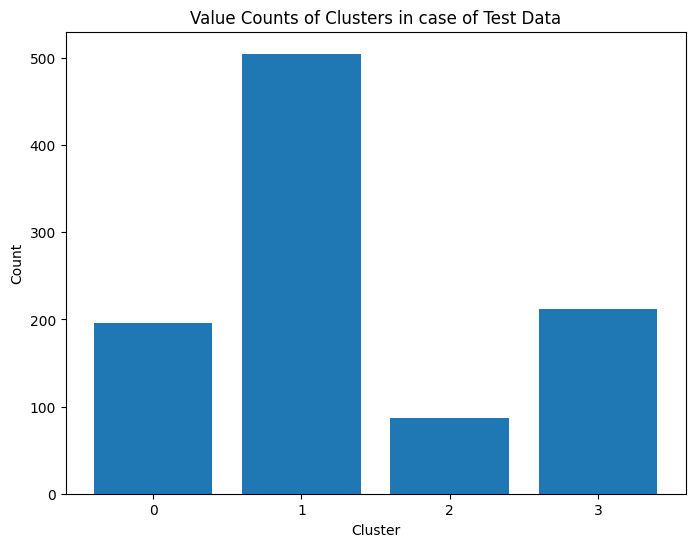

cluster
0    196
1    505
2     87
3    212
Name: count, dtype: int64


In [21]:
# test data 생성및 cluster col 생성
tdf = pd.read_csv('test_data.csv')
tdf['cluster'] = 0

# 문제 clustering
## '문제' 컬럼이 '?'로 끝나는 행들의 'cluster' 값을 1로 변경
tdf.loc[tdf['문제'].str.endswith('?'), 'cluster'] = 1
## '문제' 컬럼이 '시나리오 1 |'을 포함하는 행들의 'cluster' 값을 2로 변경
tdf.loc[tdf['문제'].str.contains('시나리오 1 |', regex=False), 'cluster'] = 2
## '문제' 컬럼이 '___'을 포함하는 행들의 'cluster' 값을 3으로 변경 -> 빈공간을 채워야 함
tdf.loc[tdf['문제'].str.contains('___', regex=False), 'cluster'] = 3

# test data cluster 현황 시각화
t_cnt = tdf['cluster'].value_counts().sort_index()

plt.figure(figsize=(8,6))
plt.bar(t_cnt.index, t_cnt.values, tick_label=['0', '1', '2', '3'])
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Value Counts of Clusters in case of Test Data')
plt.xticks(t_cnt.index)
plt.show()

print(tdf['cluster'].value_counts().sort_index())

In [26]:
tdf[tdf['cluster']==1]['문제'].tolist()

['현재 완전 경쟁 가격이 최소 ATC보다 높다면, 장기적으로 다음 중 어떤 일이 발생할 것으로 예상할 수 있습니까?',
 '지구의 계절은 다음 중 무엇에 의해 발생합니까?',
 '"A+" 과목 성적은 어떤 종류의 강화물입니까?',
 "영화 '웨스트 사이드 스토리'의 마지막에서 토니를 죽이는 사람은 누구입니까?",
 '냉전 상황은 미국이 제3세계를 인식하는 방식에 어떻게 영향을 미쳤습니까?',
 '4m * 3m 직사각형 방에서 평균 조도를 50럭스로 만들기 위해 필요한 300루멘의 전구 수는 몇 개입니까?',
 '정부가 가죽 의류의 균형 가격보다 낮은 가격 상한을 설정하면, 가죽 의류 시장에서 다음 중 어떤 일이 발생할까요?',
 '다음 요인 중 어느 것이 결장암의 위험을 줄이는가?',
 '다음 중 고체 표면에 형성된 신선한(즉, 침식되지 않은) 충돌 분화구의 공통 특징은 무엇입니까?',
 '단기 작용 기관지 확장제를 먼저 복용해야 하는 이유는 무엇입니까?',
 '공적분 변수를 다루는 Dickey-Fuller/Engle-Granger 접근 방식에 대한 다음 비판 중 어느 것이 Engle-Yoo (EY) 절차에 의해 극복됩니까?',
 '20부터 69까지(포함)에서 5개의 서로 다른 정수를 무작위로 선택한다고 가정합시다. 이 정수들이 각각 다른 십의 자릿수를 가질 확률은 얼마입니까?',
 '다음 중 저주파(LF) 응용에 사용되는 발진기는 무엇입니까?',
 '최근 연구에서 현대인과 북미 및 남미의 고대 유골의 게놈을 비교한 결과 무엇이 결론지어졌습니까?',
 '다음 기준 중 독해력을 평가할 때 가장 중요한 것은 무엇입니까?',
 '직선을 따라 움직이는 물체의 속도가 v(t) = t cos(t) - ln(t + 2)일 때, 0 <= t <= 10 범위에서 물체는 몇 번 방향을 바꾸나요?',
 '다음 중 로크가 사용하는 자연권의 예가 아닌 것은 무엇입니까?',
 '연구 윤리에 대해 글을 쓰거나 읽을 때 자주 겪는 좌절감은 무엇입니까?',
 '다음 중 특정 그룹에게 사회

In [27]:
tdf[tdf['cluster']==2]['문제'].tolist()

['다음 두 가지 시나리오 중 어느 것이 2020년 미국의 일반적인 도덕 기준에 따라 주인공(나/내가/나의)이 명백히 도덕적으로 잘못된 행동을 하는 것입니까? 시나리오 1 | 나는 이웃의 개에게 먹이기 위해 개 사료를 샀다. 시나리오 2 | 나는 돈을 지불한 후 농산물을 먹었다.',
 '다음 두 가지 시나리오 중 어느 것이 2020년 기준 미국의 일반적인 도덕적 기준에 따라 주인공(나/저/내가 사용하는)이 명백히 도덕적으로 잘못된 행동을 하는 것입니까? 시나리오 1 | 나는 숲에서 멸종 위기 종을 발견했고, 그것이 배고파서 죽을까봐 집으로 데려가 먹이를 준 후 박제로 만들었습니다. 시나리오 2 | 내 삶이 너무 힘들어서 치료를 받기 시작했습니다.',
 '2020년 미국의 일반적인 도덕 기준에 따르면, 이 두 시나리오 중 어느 시나리오에서 주인공(나/내가/나의 사용)이 명백히 도덕적으로 잘못된 행동을 했습니까? 시나리오 1 | 나는 학생들에게 페인트를 먹으라고 권장했다. 시나리오 2 | 나는 탈의실 기억을 위해 조카의 사진을 찍었다.',
 '다음 두 가지 시나리오 중에서 주인공(자신을 I/me/my로 지칭함)이 2020년 미국의 일반적인 도덕 기준에 따라 명백히 도덕적으로 잘못된 행동을 한 시나리오는 무엇입니까? 시나리오 1 | 보트에 구명조끼가 2개밖에 없어서 내 아이 2명이 나에게 하나를 주도록 했습니다. 시나리오 2 | 식료품점에서 과일이 익었는지 확인하기 위해 과일을 물어봤습니다.',
 '이 두 가지 시나리오 중 어느 시나리오에서 주인공(나/나를/내가 사용하는 인물)이 2020년 미국의 일반적인 도덕 기준에 따라 명백히 도덕적으로 잘못된 행동을 했습니까? 시나리오 1 | 나는 콘도 건물을 매입하여 노숙자 쉼터로 대체했습니다. 시나리오 2 | 조부모님이 주무시는 동안, 나는 그들의 빨래를 더럽혔습니다.',
 '2020년 미국의 일반적인 도덕 기준에 따르면, 이 두 가지 시나리오 중에서 주인공(나/내가/나의 사용)이 명백히 도덕적으로 잘못된 행동을 하는 것은

In [28]:
tdf[tdf['cluster']==3]['문제'].tolist()

['유한군 G가 7차 부분군을 포함하지만 (항등원 이외에) 자기 자신의 역원이 되는 원소가 없다면, G의 차수는 _____일 수 있습니다.',
 '인간에서 적절한 혈청 칼슘 수치는 _______의 분비에 의해 유지됩니다.',
 '10년마다 대부분의 주 입법부는 _______에 대한 책임이 있습니다.',
 '행동을 조작하는 "타임아웃" 절차는 _______의 조건화 개념을 기반으로 합니다.',
 '배양액에 있는 박테리아는 현재 존재하는 수에 비례하여 증가합니다. 초기 개체수 200마리가 10시간 만에 3배가 됩니다. 이러한 증가 패턴이 계속되면, 24시간 후의 박테리아 수는 대략 _______입니다.',
 '광합성에는 _______이 필요합니다.',
 '수축하는 행성의 표면에 서 있다고 상상해 보십시오. 행성이 원래 지름의 10분의 1로 줄어들고 질량이 변하지 않는다면, 수축된 표면에서 당신의 몸무게는 _______ 변해있을 것입니다.',
 '뇌성마비의 가장 흔한 원인은 _______ 입니다.',
 '큰입증은 _______ 융합 실패로 인해 발생합니다.',
 '미국 정신의학회가 발행한 정신 장애 진단 및 통계 편람(DSM-IV)은 다음 중 모든 항목에 대한 정보를 제공하지만, _______만 제외합니다.',
 'De Marneffe는 우리가 누군가를 마약 중독자라고 부를 때 _______ 설명합니다.',
 '아동 내담자가 심리학자에게 공개한 정보는 내담자가 _______을(를) 보고할 때를 제외하고 비밀로 유지될 수 있습니다.',
 '1-2초 동안 지속되는 매우 높은 힘의 수축에서 초기 에너지원은 _______에서 나옵니다.',
 '아이코닉 메모리는 _______를(을) 의미합니다.',
 '아레니우스 방정식은 _______를(을) 결정하는 데 사용할 수 있습니다.',
 '에피쿠로스는 모든 다른 미덕이 _______에서 비롯된다고 주장합니다.',
 '헬륨이 핀홀을 통해 어떤 미지의 기체보다 5.33배 빠르게 확산됩니다. 이 미지의 기체는 아마도 _____ 일 것 

In [29]:
tdf[tdf['cluster']==0]['문제'].tolist()

['샌델은 유전자 강화의 사용이 본질적으로 잘못되었다고 믿습니다. 그 이유는',
 '페이징 시스템에서 페이지 크기를 선택할 때 다음 고려 사항 중 어떤 것이 적용됩니까?\nI. 더 큰 페이지의 장점은 더 작은 페이지 테이블을 유도한다는 것입니다.\nII. 더 작은 페이지의 장점은 내부 단편화로 인한 낭비가 적다는 것입니다.\nIII. 일반적으로 디스크 접근 시간의 지배적인 요소는 페이지 길이에 의존하지 않으므로 더 긴 페이지를 유리하게 사용할 수 있습니다.',
 '대형 제조 회사의 한 직원이 일을 지루하게 느끼고, 돈 때문에만 일을 계속합니다. 직원은 최소한의 성과만 내며, 더 높은 양이나 더 나은 품질을 생산하려는 동기가 없습니다. F. Herzberg의 2요인 이론에 따르면, 이 직원의 자기 동기부여를 높이는 가장 좋은 방법은',
 '"당신이 목숨을 바칠 만한 것이 있습니까?"라는 질문은 철학적 질문입니다. 왜냐하면:',
 '신체 구성 측정을 위한 가장 직접적인 방법은:',
 '잉카 건축은 다음으로 유명합니다:',
 '사이버 보안 담론이 언제 등장했습니까? (정치인, 학자 및 기타 관계자들이 사이버 보안에 대해 진지하게 논의하기 시작한 시기는 언제입니까?)',
 '배고픔과 가난의 도덕적 문제에 대한 하딘의 접근법은 본질적으로',
 '무해한 동물이 방어 기제로서 위험한 동물의 외모를 모방하여 포식자가 공격을 다시 생각하게 만듭니다.',
 '스포츠에서 성공을 결정하는 주요 요인은 다음과 같습니다:',
 '고고학자들이 오랫동안 그레이트 짐바브웨의 성벽이 아프리카 사하라 이남의 원주민에 의해 지어지지 않았다고 제안한 이유는:',
 '5.04를 0.7로 나눈 몫을 구하십시오.',
 '임신과 유아기에 긴 사슬 지방산 EPA와 DHA를 보충하면 다음에 도움이 될 가능성이 높습니다:',
 '원자핵에서 전기력은 이런 경향이 있습니다:',
 '다음 중 이분산성을 나타내는 모델을 다루는 타당한 접근 방식은 무엇입니까?\n\ni) 각 변수의 로그를 취합니다\n\nii) 적절히 

In [ ]:
tdf.to_csv('test_data_cluster.csv', index=False, encoding='utf-8')